# Data Cleaning and Data Analysis

In [178]:
import pandas as pd

#load the dataset
dataset = pd.read_csv('heart.csv')

In [179]:
dataset.head() #view first 5 rows of data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


In [180]:
# see data row and column
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
dataset.shape

(918, 12)

In [181]:
# see data types of each column
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

In [182]:
#statistical summary
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,916.000000,915.000000,917.000000,918.000000,903.000000
mean,53.510893,132.396514,198.852620,0.232787,136.767721,0.887364,0.555925
std,9.432617,18.514154,109.193372,0.422839,25.442922,1.066570,0.497138
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [183]:
# any null-values?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     916 non-null    float64
 5   FastingBS       915 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           917 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    903 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [184]:
# drop null values row
dataset.dropna(inplace=True)

#not dropping any columns since all are related data
# and show again the shape of dataset
dataset.shape

(897, 12)

In [185]:
# https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d
# begin with checking unique values in each columns to ensure values are correct and clean

# Age: age of the patient [years]
dataset['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [186]:
# Sex: sex of the patient [M: Male, F: Female]
dataset['Sex'].unique()

array(['M', 'F'], dtype=object)

In [187]:
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
dataset['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [188]:
# RestingBP: resting blood pressure [mm Hg]
dataset['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
       200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152, 116,
         0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102,
        96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192, 129,
       164], dtype=int64)

In [189]:
# Cholesterol: serum cholesterol [mm/dl]
dataset['Cholesterol'].unique()

array([289., 180., 283., 214., 195., 339., 237., 208., 207., 284., 211.,
       164., 204., 234., 273., 196., 201., 248., 267., 223., 184., 288.,
       215., 209., 260., 468., 188., 518., 167., 224., 172., 186., 254.,
       306., 250., 177., 227., 230., 294., 264., 259., 175., 318., 216.,
       340., 233., 205., 245., 194., 270., 213., 365., 342., 253., 277.,
       202., 297., 225., 246., 412., 265., 182., 218., 268., 163., 529.,
       100., 206., 238., 139., 263., 291., 229., 307., 210., 329., 147.,
        85., 269., 275., 179., 392., 466., 129., 241., 255., 276., 282.,
       338., 160., 156., 272., 240., 393., 161., 228., 292., 388., 166.,
       247., 331., 341., 243., 279., 198., 249., 168., 603., 159., 190.,
       185., 290., 212., 231., 222., 235., 320., 266., 287., 404., 312.,
       251., 328., 285., 280., 192., 193., 308., 219., 257., 132., 226.,
       217., 303., 298., 256., 295., 173., 315., 281., 309., 200., 336.,
       355., 326., 171., 491., 271., 274., 394., 22

In [190]:
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
dataset['FastingBS'].unique()

array([0., 1.])

In [191]:
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
dataset['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [192]:
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
dataset['MaxHR'].unique()

array([172., 156.,  98., 108., 122., 170., 142., 130., 120.,  99., 145.,
       140., 137., 150., 166., 165., 125., 160., 164., 138., 178., 112.,
       118., 127., 114., 154., 155.,  87., 148., 100., 168., 184., 121.,
       153., 134.,  96., 174., 175., 144.,  82., 135., 115., 128., 116.,
        94., 110.,  92., 180., 152., 124., 106., 185., 139., 190., 146.,
       158., 132., 176., 119., 188., 162., 105.,  90., 136., 167., 129.,
       102., 143., 103.,  91., 126.,  93., 131., 149., 123., 182., 141.,
        77., 109., 133., 179., 113., 104.,  95.,  97., 117.,  86.,  63.,
       157.,  83.,  60.,  70., 163.,  67.,  72.,  78.,  84., 111.,  80.,
       107., 161.,  69.,  88.,  73., 159., 151., 181., 186., 177., 173.,
       169., 171., 147.,  71., 192., 195., 194., 187., 202.])

In [193]:
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
dataset['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [194]:
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
dataset['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.3,  0.3,  1.8,  2.6,
       -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1, -0.7,
       -0.8,  1.6,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [195]:
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
dataset['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [196]:
# HeartDisease: output class [1: heart disease, 0: Normal]
dataset['HeartDisease'].unique()

array([0., 1.])

In [197]:
# print duplicated rows https://www.w3schools.com/python/pandas/pandas_cleaning_duplicates.asp
# it will returns True for every row that is a duplicate, othwerwise False
print(dataset.duplicated())
#no duplicated rows, no need to remove any rows

0      False
1      False
2      False
3      False
4      False
       ...  
912    False
913    False
914    False
916    False
917    False
Length: 897, dtype: bool


# Correlations and Visualize

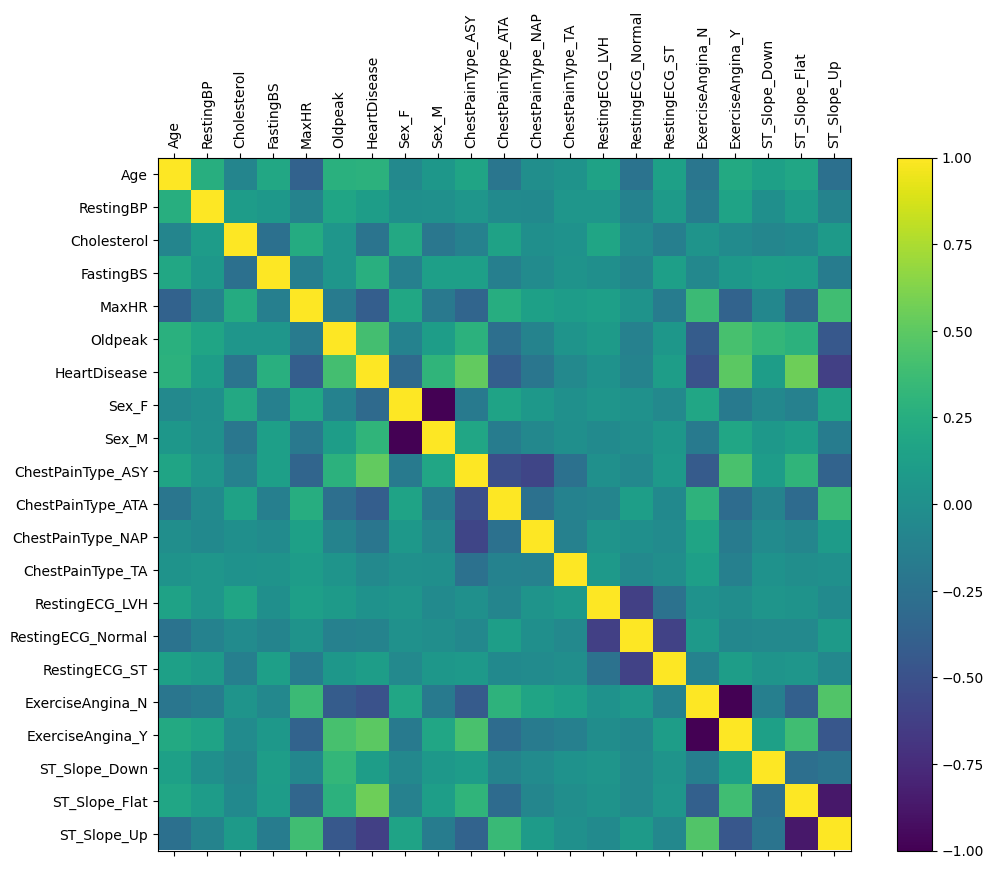

In [198]:
# https://www.linkedin.com/pulse/detailed-preprocessing-process-machine-learning-python-leonardo-a

# one-hot encoding for all categorical columns https://www.geeksforgeeks.org/python-pandas-get_dummies-method/
encoded_dataset = pd.get_dummies(dataset)

# compute the correlation matrix
correlations = encoded_dataset.corr()

import matplotlib.pyplot as plt 
# plot matrix as a heatmap
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# Set label
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.columns)), correlations.columns)

plt.show()

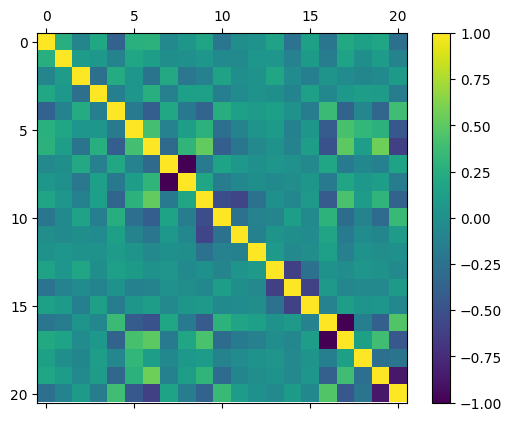

In [199]:
# without establishing label
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

# Data Visualization with Histogram

In [200]:
# https://www.linkedin.com/pulse/detailed-preprocessing-process-machine-learning-python-leonardo-a
# generate charts
%matplotlib inline

# this dataset contains both numerical and categorical features, a scatter plot may not be the most suitable visualization, histogram is the better way

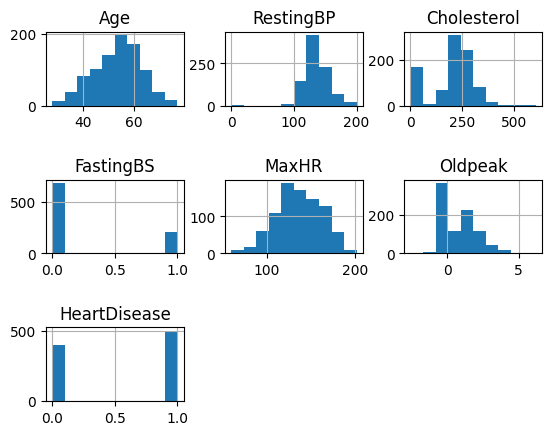

In [201]:
# show histogram of each column
dataset.hist()
plt.subplots_adjust(hspace=1.0) #dont let diagrams cross over
plt.show()

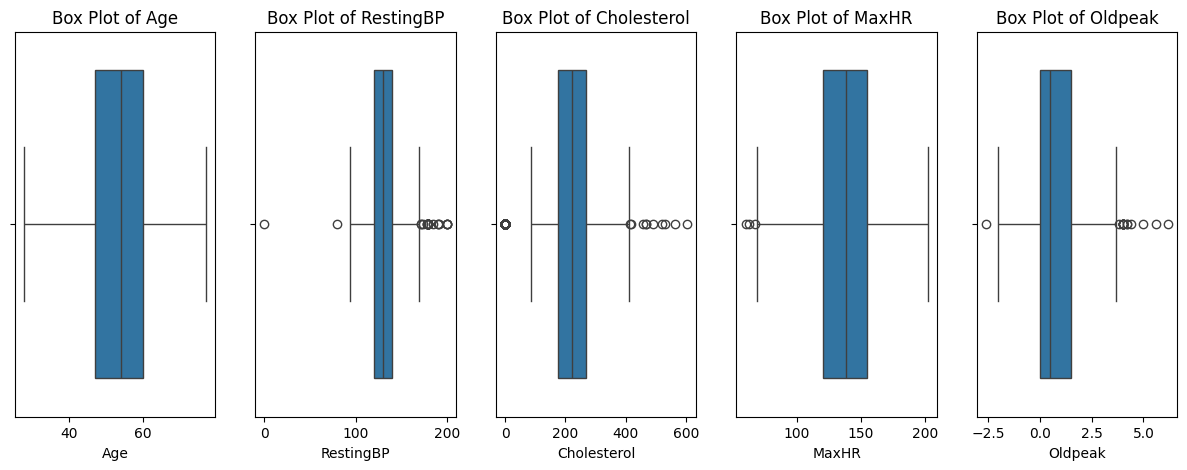

In [202]:
import seaborn as sns

# choose the numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=column, data=dataset, ax=axes[i])

# titles
for i, column in enumerate(numerical_columns):
    axes[i].set_title(f'Box Plot of {column}')

plt.show()

# Feature Scaling

In [203]:
from sklearn.preprocessing import StandardScaler 

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# columns that need scaling
columns_to_scale = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# implement standardization (Z-score normalization)
scaler = StandardScaler()
encoded_dataset[columns_to_scale] = scaler.fit_transform(encoded_dataset[columns_to_scale])

# view the latest data values
print(encoded_dataset.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433892   0.408105     0.819937        0.0  1.391609 -0.828169   
1 -0.483107   1.485576    -0.175478        0.0  0.759612  0.104965   
2 -1.750820  -0.130630     0.765143        0.0 -1.531377 -0.828169   
3 -0.588750   0.300358     0.135019        0.0 -1.136379  0.571531   
4  0.045107   0.946841    -0.038494        0.0 -0.583382 -0.828169   

   HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0           0.0  False   True              False  ...              False   
1           1.0   True  False              False  ...               True   
2           0.0  False   True              False  ...              False   
3           1.0   True  False               True  ...              False   
4           0.0  False   True              False  ...               True   

   ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0             False           False              

In [204]:
# interaction features: combined effect of the two factors might have an impact on heart disease risk https://www.geeksforgeeks.org/data-analysis-with-python/

#patient's age and their maximum heart rate
encoded_dataset["Age_MaxHR_Interaction"] = encoded_dataset["Age"] * encoded_dataset["MaxHR"] 

# patient's age may impact the relationship between blood pressure and the likelihood of heart disease
encoded_dataset["Age_RestingBP_Interaction"] = encoded_dataset["Age"] * encoded_dataset["RestingBP"]

# cholesterol and resting blood pressure
encoded_dataset["Cholesterol_RestingBP_Interaction"] = encoded_dataset["Cholesterol"] * encoded_dataset["RestingBP"]

# cholesterol and maximum heart rate
encoded_dataset["Cholesterol_MaxHR_Interaction"] = encoded_dataset["Cholesterol"] * encoded_dataset["MaxHR"]

# view the latest data values
print(encoded_dataset.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433892   0.408105     0.819937        0.0  1.391609 -0.828169   
1 -0.483107   1.485576    -0.175478        0.0  0.759612  0.104965   
2 -1.750820  -0.130630     0.765143        0.0 -1.531377 -0.828169   
3 -0.588750   0.300358     0.135019        0.0 -1.136379  0.571531   
4  0.045107   0.946841    -0.038494        0.0 -0.583382 -0.828169   

   HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  RestingECG_ST  \
0           0.0  False   True              False  ...          False   
1           1.0   True  False              False  ...          False   
2           0.0  False   True              False  ...           True   
3           1.0   True  False               True  ...          False   
4           0.0  False   True              False  ...          False   

   ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0              True             False          False          False   
1   

# Data Split

In [205]:
# https://realpython.com/train-test-split-python-data/#prerequisites-for-using-train_test_split
from sklearn.model_selection import train_test_split

# get x and y data
x = encoded_dataset.drop("HeartDisease", axis=1)
y = encoded_dataset["HeartDisease"]

# split data randomly with 70% train data, 30% test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [206]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_MaxHR_Interaction,Age_RestingBP_Interaction,Cholesterol_RestingBP_Interaction,Cholesterol_MaxHR_Interaction
127,-0.588750,-1.315847,-0.330726,0.0,1.510108,1.038098,True,False,True,False,...,False,True,False,False,False,True,-0.889076,0.774705,0.435184,-0.499432
256,0.150750,-0.130630,1.778822,0.0,0.522613,-0.828169,True,False,False,True,...,False,True,False,False,False,True,0.078784,-0.019692,-0.232367,0.929636
473,0.678964,0.461979,1.066507,1.0,-0.583382,0.758158,False,True,False,False,...,True,False,True,False,True,False,-0.396095,0.313667,0.492704,-0.622181
477,0.784607,-1.208100,-1.819281,1.0,-1.136379,1.038098,False,True,True,False,...,False,False,True,True,False,False,-0.891611,-0.947884,2.197874,2.067393
802,-0.166178,-1.315847,0.308531,1.0,0.404113,-0.734856,False,True,True,False,...,False,True,False,False,False,True,-0.067155,0.218665,-0.405980,0.124682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-1.962106,0.408105,-0.294197,0.0,0.522613,-0.828169,True,False,True,False,...,False,True,False,False,False,True,-1.025422,-0.800746,-0.120063,-0.153751
302,-0.060536,-0.399997,-1.819281,1.0,-0.662382,0.571531,False,True,True,False,...,False,True,False,False,False,True,0.040098,0.024214,0.727708,1.205058
314,-0.060536,-2.824306,-1.819281,0.0,0.167115,1.038098,False,True,True,False,...,False,False,True,True,False,False,-0.010116,0.170971,5.138207,-0.304028
794,-0.377464,-0.184503,-0.029362,0.0,1.036111,-0.828169,False,True,False,False,...,False,True,False,False,False,True,-0.391094,0.069643,0.005417,-0.030422


In [207]:
x_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_MaxHR_Interaction,Age_RestingBP_Interaction,Cholesterol_RestingBP_Interaction,Cholesterol_MaxHR_Interaction
118,-1.962106,-0.669365,-0.358122,0.0,1.905106,-0.828169,True,False,False,False,...,True,True,False,False,False,True,-3.738021,1.313365,0.239715,-0.682261
641,-0.800035,0.300358,0.399854,0.0,0.601613,-0.828169,True,False,True,False,...,False,False,True,False,True,False,-0.481311,-0.240297,0.120099,0.240557
80,0.150750,-1.208100,0.710350,0.0,0.917611,-0.828169,False,True,False,False,...,False,True,False,False,False,True,0.138330,-0.182121,-0.858174,0.651825
344,-0.271821,-0.669365,-1.819281,1.0,-1.294379,-0.828169,False,True,True,False,...,False,True,False,False,True,False,0.351839,0.181948,1.217763,2.354838
455,0.573321,1.162335,-1.819281,0.0,-0.227884,0.571531,False,True,True,False,...,True,False,True,False,False,True,-0.130650,0.666391,-2.114614,0.414584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,-1.539535,-0.130630,0.984317,0.0,0.127615,-0.828169,False,True,True,False,...,False,True,False,False,False,True,-0.196467,0.201109,-0.128581,0.125613
151,-0.588750,-1.746836,-0.367255,0.0,-1.452378,-0.828169,False,True,False,True,...,False,True,False,False,False,True,0.855087,1.028449,0.641533,0.533392
356,-0.800035,-0.938733,-1.819281,0.0,-0.938880,0.571531,False,True,True,False,...,False,False,True,False,True,False,0.751137,0.751019,1.707819,1.708087
452,0.678964,0.408105,0.746879,0.0,-0.741381,0.571531,False,True,True,False,...,True,False,True,False,True,False,-0.503371,0.277089,0.304805,-0.553722


In [208]:
y_train

127    0.0
256    0.0
473    1.0
477    1.0
802    0.0
      ... 
77     0.0
302    1.0
314    0.0
794    0.0
664    1.0
Name: HeartDisease, Length: 627, dtype: float64

In [209]:
y_test

118    0.0
641    0.0
80     0.0
344    1.0
455    0.0
      ... 
91     0.0
151    0.0
356    1.0
452    1.0
83     0.0
Name: HeartDisease, Length: 270, dtype: float64

# Model Training

In [210]:
# https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

# training model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logistic_model = LogisticRegression()

# fit the model to training data
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [211]:
# similar to logistic
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

# Model Evaluation

In [212]:
from sklearn.metrics import accuracy_score

# logistic model accuracy
y_pred_logistic_model = logistic_model.predict(x_test)
logistic_model_accuracy = accuracy_score(y_test, y_pred_logistic_model)
print("Test Accuracy of logistic model: ", logistic_model_accuracy)

# decision tree accuracy
decision_tree_model_y_pred = decision_tree_model.predict(x_test)
decision_tree_model_accuracy = accuracy_score(y_test, decision_tree_model_y_pred)
print("Test Accuracy of decision tree model: ", decision_tree_model_accuracy)

Test Accuracy of logistic model:  0.8740740740740741
Test Accuracy of decision tree model:  0.7814814814814814


In [213]:
# https://proclusacademy.com/blog/practical/precision-recall-f1-score-sklearn/
from sklearn.metrics import precision_score, recall_score, f1_score

# logistic regression model
precision_logistic = precision_score(y_test, y_pred_logistic_model) #how many positive predictions made were actually correct
recall_logistic = recall_score(y_test, y_pred_logistic_model) #how many actual positive instances were correctly predicted
f1_logistic = f1_score(y_test, y_pred_logistic_model) #combine precision and recall into a balanced measure

print("Precision for logistic model: ", precision_logistic)
print("Recall for logistic model: ", recall_logistic)
print("F1-Score for logistic model: ", f1_logistic)

# decision tree model
precision_decision_tree = precision_score(y_test, decision_tree_model_y_pred)
recall_decision_tree = recall_score(y_test, decision_tree_model_y_pred)
f1_decision_tree = f1_score(y_test, decision_tree_model_y_pred)

print("\nPrecision for decision tree model: ", precision_decision_tree)
print("Recall for decision tree model: ", recall_decision_tree)
print("F1-Score for decision tree model: ", f1_decision_tree)

Precision for logistic model:  0.8363636363636363
Recall for logistic model:  0.9517241379310345
F1-Score for logistic model:  0.8903225806451613

Precision for decision tree model:  0.7905405405405406
Recall for decision tree model:  0.8068965517241379
F1-Score for decision tree model:  0.7986348122866894


# Model Tuning

In [214]:
# try to remove the interacted columns

# get x and y data
columns_to_drop = ["HeartDisease", "Age_MaxHR_Interaction", "Age_RestingBP_Interaction", "Cholesterol_RestingBP_Interaction", "Cholesterol_MaxHR_Interaction"]
x = encoded_dataset.drop(columns=columns_to_drop, axis=1)
y = encoded_dataset["HeartDisease"]

# split data randomly with 70% train data, 30% test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [215]:
x_train #check current columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
100,1.207178,-0.130630,0.692085,0.0,-0.859881,0.104965,False,True,True,False,False,False,False,False,True,False,True,False,True,False
826,-0.271821,-0.399997,0.418118,1.0,1.154610,1.411352,False,True,False,False,True,False,True,False,False,True,False,False,True,False
166,-0.377464,0.408105,0.290267,0.0,0.127615,3.837499,False,True,True,False,False,False,False,False,True,False,True,False,True,False
475,0.573321,2.455299,-1.819281,1.0,-0.662382,-0.828169,False,True,True,False,False,False,True,False,False,False,True,False,True,False
841,0.890250,-0.130630,0.582499,0.0,-1.570877,0.291591,True,False,False,False,True,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,-1.222606,-0.938733,0.107622,0.0,0.009115,-0.828169,True,False,False,False,True,False,False,False,True,True,False,False,False,True
663,1.312821,1.485576,0.427250,0.0,-0.662382,-0.828169,False,True,False,True,False,False,False,True,False,False,True,False,True,False
375,2.052320,1.485576,-1.819281,0.0,-0.622882,-0.828169,True,False,False,False,True,False,False,False,True,True,False,False,False,True
580,-0.271821,-0.076756,-0.431180,1.0,-0.267383,0.104965,False,True,True,False,False,False,True,False,False,False,True,False,True,False


In [216]:
# train model again

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [217]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [218]:
# Check accuracy to compare

# logistic model accuracy
y_pred_logistic_model = logistic_model.predict(x_test)
logistic_model_accuracy = accuracy_score(y_test, y_pred_logistic_model)
print("Test Accuracy of logistic model: ", logistic_model_accuracy)

# decision tree accuracy
decision_tree_model_y_pred = decision_tree_model.predict(x_test)
decision_tree_model_accuracy = accuracy_score(y_test, decision_tree_model_y_pred)
print("Test Accuracy of decision tree model: ", decision_tree_model_accuracy)

Test Accuracy of logistic model:  0.8518518518518519
Test Accuracy of decision tree model:  0.7555555555555555


In [219]:
# check other metrics to compare

# logistic regression model
precision_logistic = precision_score(y_test, y_pred_logistic_model) #how many positive predictions made were actually correct
recall_logistic = recall_score(y_test, y_pred_logistic_model) #how many actual positive instances were correctly predicted
f1_logistic = f1_score(y_test, y_pred_logistic_model) #combine precision and recall into a balanced measure

print("Precision for logistic model: ", precision_logistic)
print("Recall for logistic model: ", recall_logistic)
print("F1-Score for logistic model: ", f1_logistic)

# decision tree model
precision_decision_tree = precision_score(y_test, decision_tree_model_y_pred)
recall_decision_tree = recall_score(y_test, decision_tree_model_y_pred)
f1_decision_tree = f1_score(y_test, decision_tree_model_y_pred)

print("\nPrecision for decision tree model: ", precision_decision_tree)
print("Recall for decision tree model: ", recall_decision_tree)
print("F1-Score for decision tree model: ", f1_decision_tree)

Precision for logistic model:  0.85625
Recall for logistic model:  0.8896103896103896
F1-Score for logistic model:  0.8726114649681528

Precision for decision tree model:  0.8142857142857143
Recall for decision tree model:  0.7402597402597403
F1-Score for decision tree model:  0.7755102040816325


In [220]:
# comparison results shows that the models that after dropping interacted columns performed better. Thus, the interacted columns are not helping in enhancing performance

# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
# Hence, perform model tuning in each model

# Logistic Model:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Common C values
}

logistic_model = LogisticRegression()
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_ #get best
print("Best Hyperparameters:", best_params)

# train the final model with best hyperparameters
final_model = LogisticRegression(C=best_params['C'])
final_model.fit(x_train, y_train)

# evaluate
test_accuracy = final_model.score(x_test, y_test)
print("Test Accuracy of the tuned logistic model: ", test_accuracy)

Best Hyperparameters: {'C': 1}
Test Accuracy of the tuned logistic model:  0.8518518518518519


In [221]:
# the output of best hyperparameters is 10 means that the model with a moderate level of regularization performed the best on my test data
# output shows my model that performed well on test data with accuracy of 87.41%

In [222]:
# Decision Tree Model https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4,5 ]
}

decision_tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

final_model = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)
final_model.fit(x_train, y_train)

test_accuracy = final_model.score(x_test, y_test)
print("Test Accuracy of the tuned decision tree model: ", test_accuracy)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
Test Accuracy of the tuned decision tree model:  0.8185185185185185


In [223]:
# The improvement in accuracy indicates that the tuned decision tree model is better at making predictions on my default model test data. It shows hyperparameter tuning to optimize my decision tree model's performance.

In [224]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

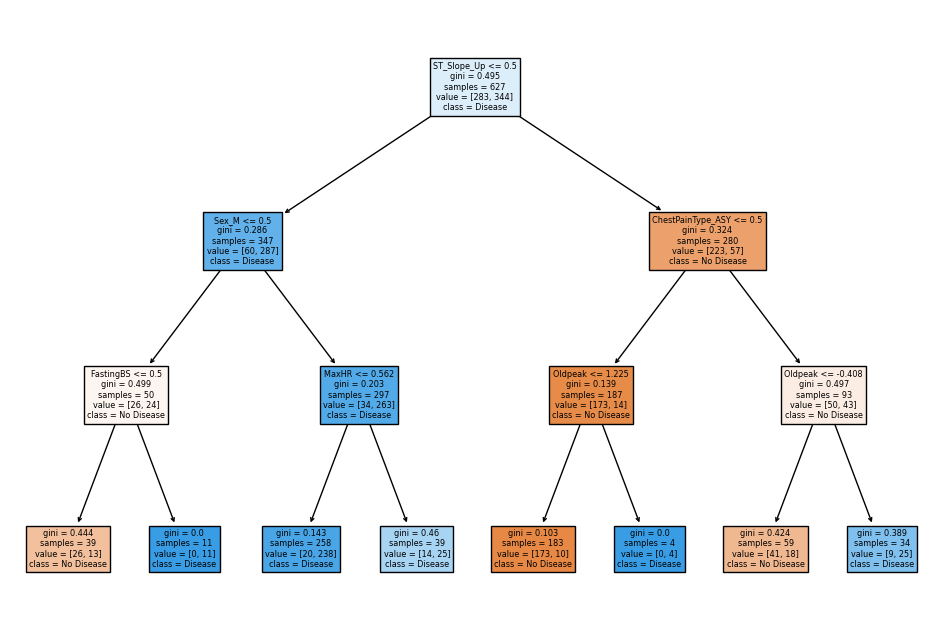

In [225]:
from sklearn import tree #https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees

fig = plt.figure(figsize=(12, 8))
_ = tree.plot_tree(
    decision_tree_model,
    feature_names=x_train.columns,
    class_names=['No Disease', 'Disease'], #No Disease(no heart disease)
    filled=True
)
plt.show() # shows the decision tree that make decision based on which feature
